# Imports

In [1]:
import torch
from model import Model
from utils import xml_to_csv
from torch.utils.data import DataLoader, random_split
from dataset import MyDecDataset, MySegDataset, MyDataLoader
from visualize import show_labeled_image, show_image_and_seg

# Datasets

## Detection Dataset

### TODOS:

- Transformations applied to train, val, and test.... Maybe we need to find a better way

In [2]:
# Convert XML files to CSV to create dataset
xml_to_csv('./Dataset/blob/**/*.xml', 'labels.csv')

Processed 8876 images


In [3]:
# Create custom dataset class
dataset_dt = MyDecDataset('labels.csv')

In [4]:
# Split dataset
train_size = int(0.7 * len(dataset_dt))
test_size = int(0.15 * len(dataset_dt))
validation_size = len(dataset_dt) - (train_size + test_size)

train_dt, validation_dt, test_dt = random_split(dataset_dt, [train_size, validation_size, test_size])

In [5]:
print("Size of detection test set", len(train_dt))
print("Size of detection training set:", len(test_dt))
print("Size of detection validation set:", len(validation_dt))

Size of detection test set 6209
Size of detection training set: 1330
Size of detection validation set: 1332


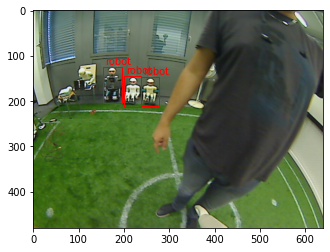

In [6]:
test_loader_dt = MyDataLoader(test_dt, batch_size=1, shuffle=True)
train_loader_dt = MyDataLoader(train_dt, batch_size=1, shuffle=True)
validation_loader_dt = MyDataLoader(validation_dt, batch_size=1, shuffle=True)

# Display first training image
for image, target in train_loader_dt:
    show_labeled_image(image[0], target[0]["boxes"], target[0]["labels"])
    break

## Segmentation Dataset

In [7]:
# Create custom dataset
dataset_seg = MySegDataset('./Dataset/segmentation')

In [8]:
print("Size of segmentation dataset ", len(dataset_seg))

Size of segmentation dataset  1192


In [9]:
# Split dataset
train_size = int(0.7 * len(dataset_seg))
test_size = int(0.15 * len(dataset_seg))
validation_size = len(dataset_seg) - (train_size + test_size)

train_seg, validation_seg, test_seg = random_split(dataset_seg, [train_size, validation_size, test_size])

In [10]:
print("Size of segmentation test set", len(test_seg))
print("Size of detection training set:", len(train_seg))
print("Size of detection validation set:", len(validation_seg))

Size of segmentation test set 178
Size of detection training set: 834
Size of detection validation set: 180


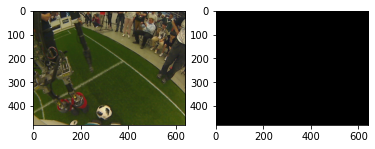

In [11]:
# Create dataloader for segmentation data
test_loader_seg = MyDataLoader(test_seg, batch_size=1, shuffle=True)
train_loader_seg = MyDataLoader(train_seg, batch_size=1, shuffle=True)
validation_loader_seg = MyDataLoader(validation_seg, batch_size=1, shuffle=True)

# Just as a sanity check display the test set
for images, targets in train_loader_seg:
    show_image_and_seg(images[0], targets[0])
    break

### Model

In [12]:
model = Model()
test_seg_data_loader = DataLoader(test_seg, batch_size=1, shuffle=True) ## Remember to fix the DataLoader (Or it will depend on how we will train)
for _, (images, targets) in enumerate(test_seg_data_loader):
    print(images.shape)
    print(model(images).shape)

torch.Size([1, 3, 480, 640])


RuntimeError: The size of tensor a (160) must match the size of tensor b (320) at non-singleton dimension 3